# Geometric Transformation using PIL (pillow)

### Faris D. Qadri

## Libraries and helper func

In [51]:
from PIL import Image
from PIL import ImageOps 

import matplotlib.pyplot as plt
import numpy as np

In [52]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"): # plotting image left-right
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

#  Geometric Transformations


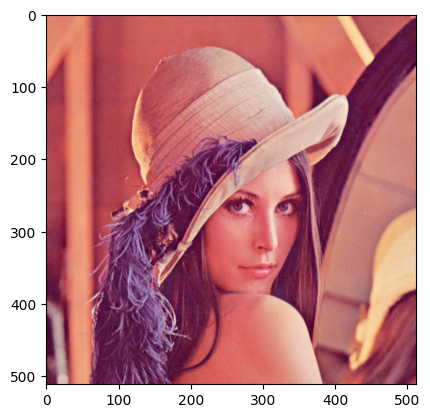

In [53]:
image = Image.open("lenna.png")
plt.imshow(image)
plt.show()

We can scale the horizontal axis by two and leave the vertical axis as is:


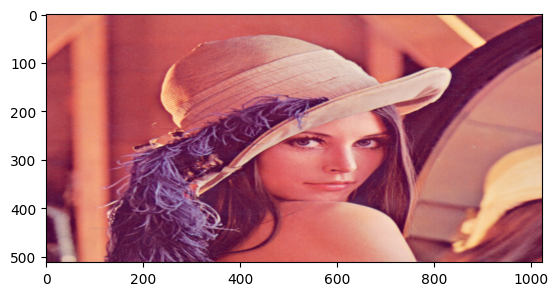

In [55]:
width, height = image.size
new_width = 2 * width # streched to the right
new_hight = height
new_image = image.resize((new_width, new_hight))
plt.imshow(new_image)
plt.show()

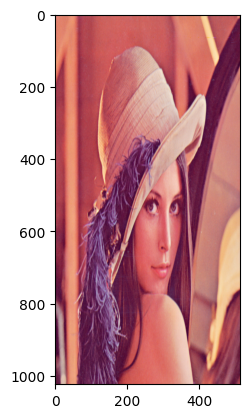

In [56]:
new_width = width
new_hight = 2 * height # streched to bottow
new_image = image.resize((new_width, new_hight))
plt.imshow(new_image)
plt.show()

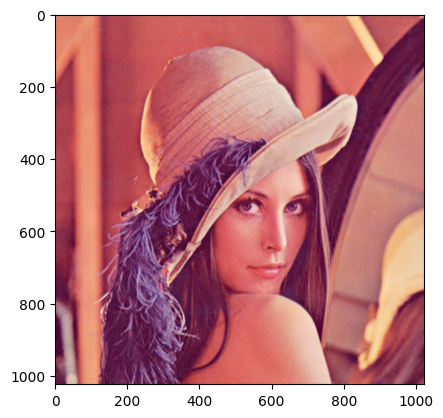

In [57]:
new_width = 2 * width # double sized
new_hight = 2 * height # double sized
new_image = image.resize((new_width, new_hight))
plt.imshow(new_image)
plt.show()

We can also shrink the image's width and height both by 1/2:


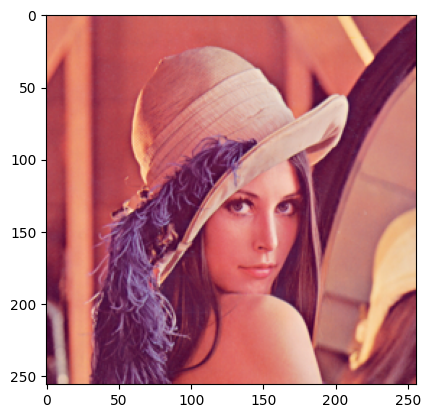

In [59]:
new_width = width // 2 # smaller sized
new_hight = height // 2 # smaller sized

new_image = image.resize((new_width, new_hight))
plt.imshow(new_image)
plt.show()

## Rotation 


In [60]:
theta = 45 # degrees
new_image = image.rotate(theta) # rotate by degrees

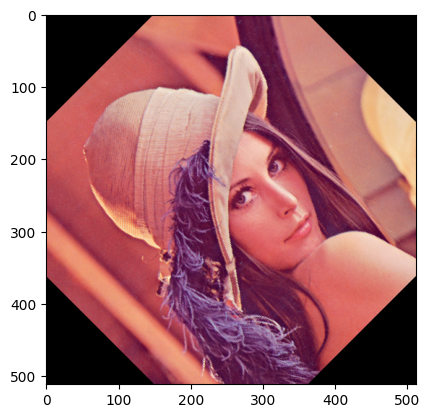

In [61]:
plt.imshow(new_image)
plt.show()

# Mathematical Operations 


## Array Operations 


In [62]:
image = np.array(image)

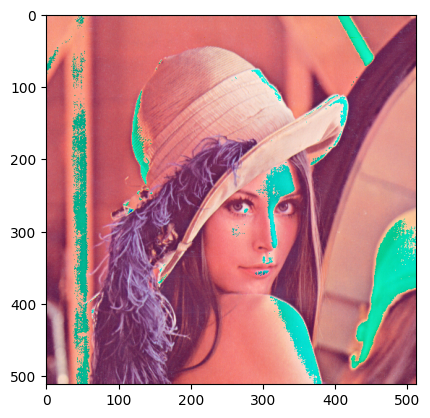

In [63]:
new_image = image + 20
plt.imshow(new_image)
plt.show()

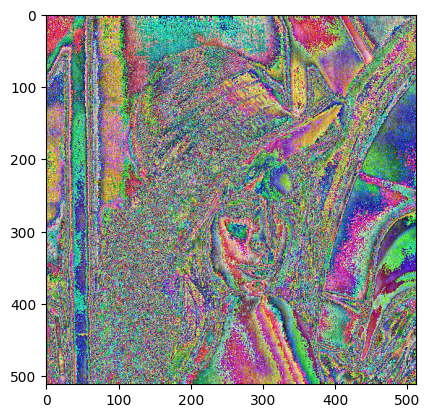

In [66]:
new_image = 10 * image # multiply every pixel intensity by a constant
plt.imshow(new_image)
plt.show()

In [67]:
Noise = np.random.normal(0, 20, (height, width, 3)).astype(np.uint8) # generate an array of random noises with the same shape and data type as our image.
Noise.shape

(512, 512, 3)

We add the generated noise to the image and plot the result. We see the values that have corrupted the image:


(512, 512, 3)


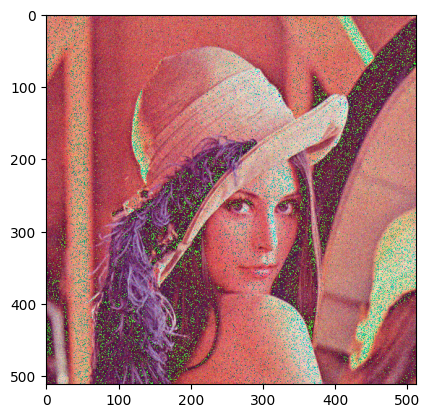

In [71]:
new_image = image + Noise

print(new_image.shape) # noise blended into the layer
plt.imshow(new_image)
plt.show()

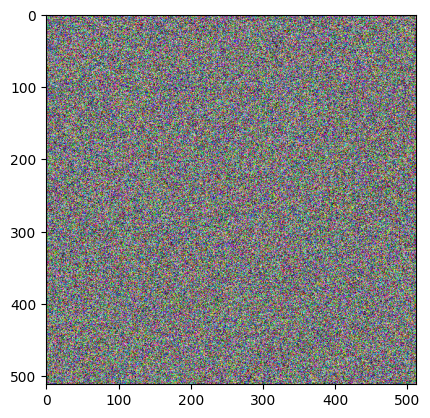

In [72]:
new_image = image * Noise # multiplying by noise value

plt.imshow(new_image)
plt.show()

## Matrix Operations 


In [79]:
im_gray = Image.open("barbara.png")

Even though the image is gray, it has three channels; we can convert it to a one-channel image.


In [80]:
im_gray = ImageOps.grayscale(im_gray) # converting into a one channel image

We can convert the PIL image to a numpy array:


In [81]:
im_gray = np.array(im_gray )

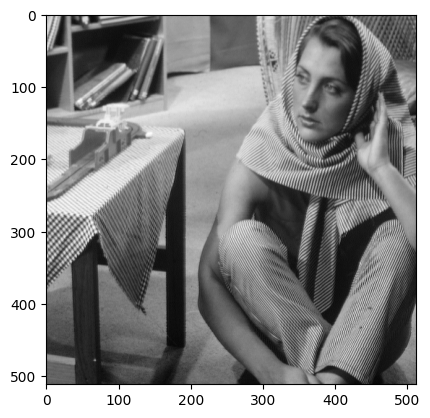

In [82]:
plt.imshow(im_gray,cmap='gray')
plt.show()

We can apply algorithms designed for matrices.  We can use  Singular Value Decomposition, decomposing our image matrix into  a product of three matrices.


In [83]:
U, s, V = np.linalg.svd(im_gray , full_matrices=True)

We see <code>s</code> is not rectangular:


In [84]:
s.shape

(512,)

We can convert  <code>s</code> to a diagonal matrix <code>S</code>:


In [85]:
S = np.zeros((im_gray.shape[0], im_gray.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)

We can plot the matrix U and V:


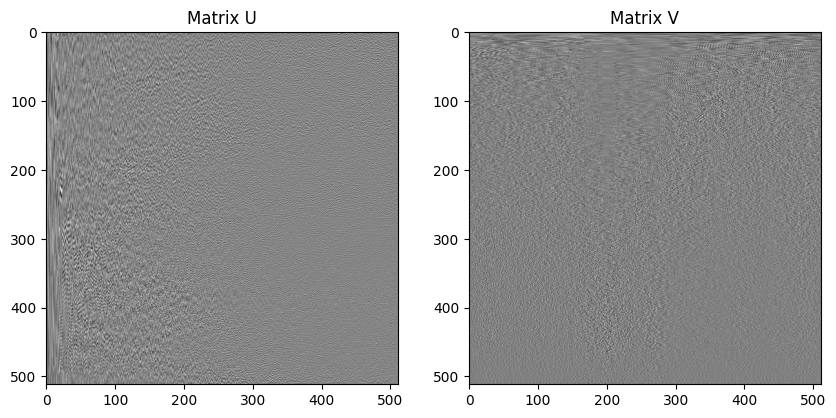

In [86]:
plot_image(U, V, title_1="Matrix U", title_2="Matrix V")

We see most of the elements in S are zero:


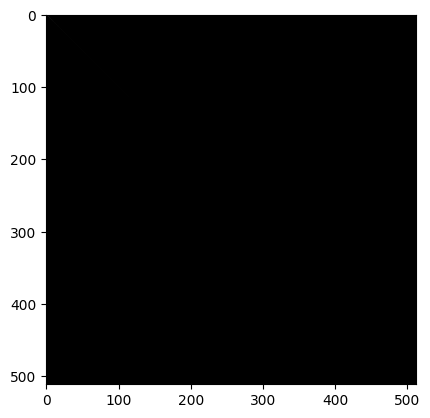

In [87]:
plt.imshow(S, cmap='gray')
plt.show()

We can find the matrix product of all the  matrices. First, we can perform matrix multiplication on S and U and assign it to `B` and plot the results: 


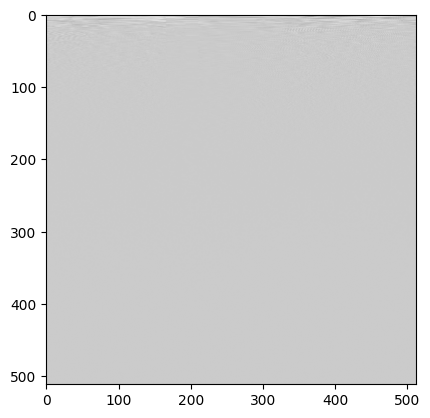

In [88]:
B = S.dot(V)
plt.imshow(B,cmap='gray')
plt.show()

We can find the matrix product of `U`, `S`, and `B`. We see it's the entire image:


In [89]:
A = U.dot(B)

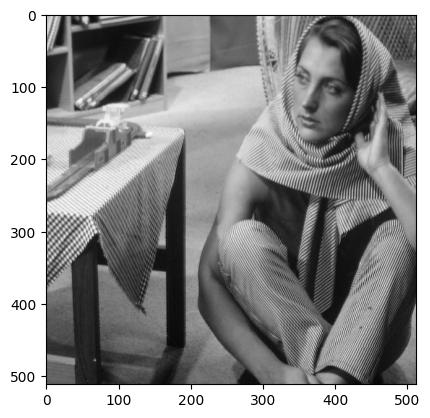

In [90]:
plt.imshow(A,cmap='gray')
plt.show()

It turns out that many elements are redundant. We can eliminate some rows and columns of S and V and approximate the image by finding the product:


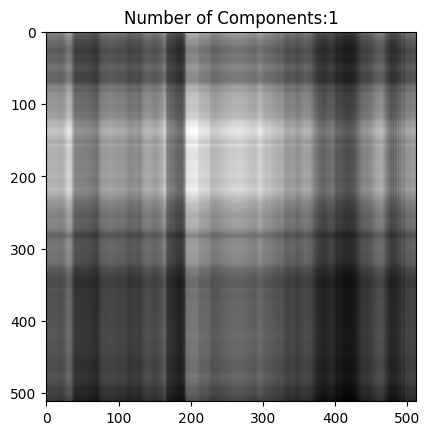

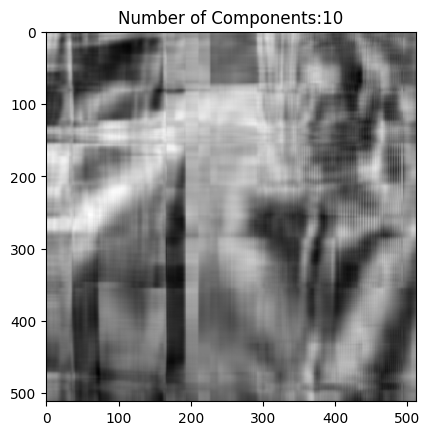

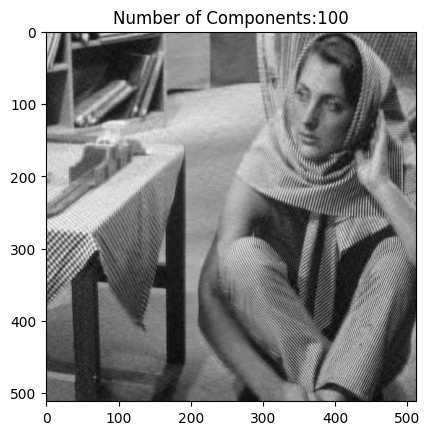

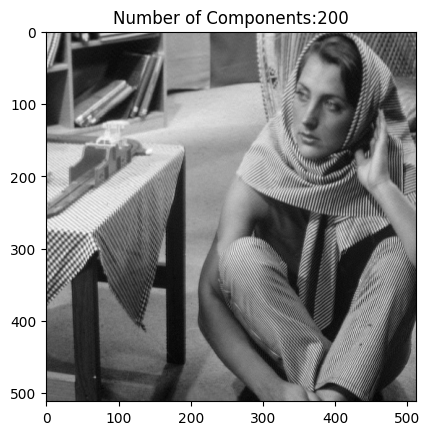

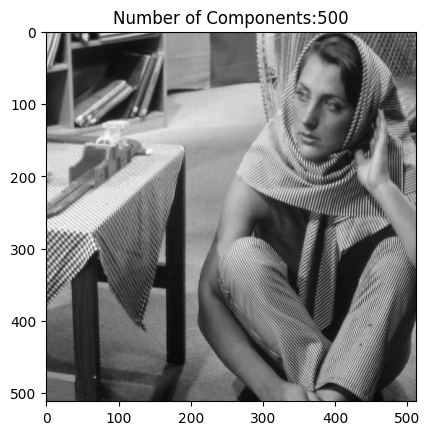

In [91]:
for n_component in [1,10,100,200, 500]:
    S_new = S[:, :n_component]
    V_new = V[:n_component, :]
    A = U.dot(S_new.dot(V_new))
    plt.imshow(A,cmap='gray')
    plt.title("Number of Components:"+str(n_component))
    plt.show()